The goal of this project is to use historical data to predict if a customer will churn or not. 

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filePath = 'data/Telco-Customer-Churn.csv'
data = pd.read_csv(filePath)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Quick Data Check

In [5]:
# Check for data type and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
# Quick statistical summary of numerical columns
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Exploratory Data Analysis

In [8]:
# Count the number of null avaiable in each columns
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

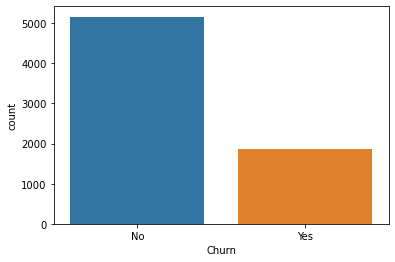

In [10]:
# Display the balance of the lable using count plot
sns.countplot(data=data, x='Churn');

In [16]:
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

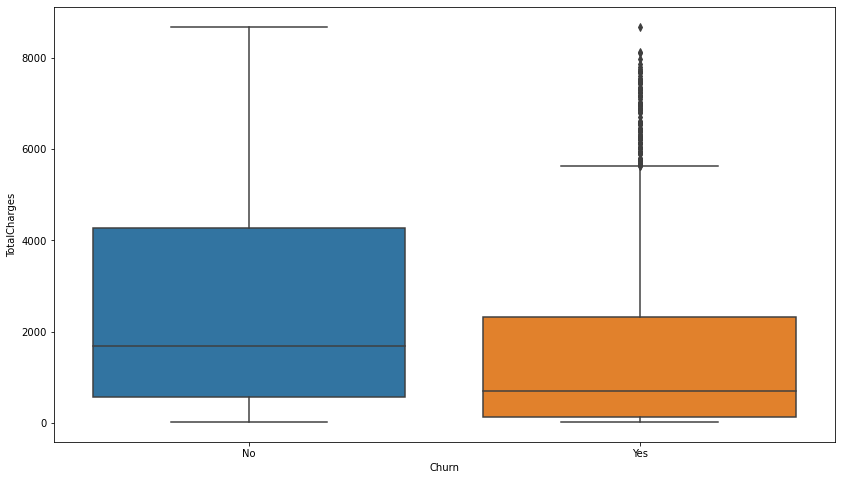

In [26]:
# Display the distribution of total charges and Churn using boxplot
plt.figure(figsize=(14,8))
sns.boxplot(x=data['Churn'], y=data['TotalCharges']);

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

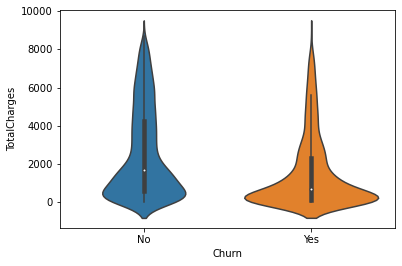

In [28]:
# # Display the distribution of total charges and Churn using violine plot
sns.violinplot(data=data, y='TotalCharges', x='Churn')

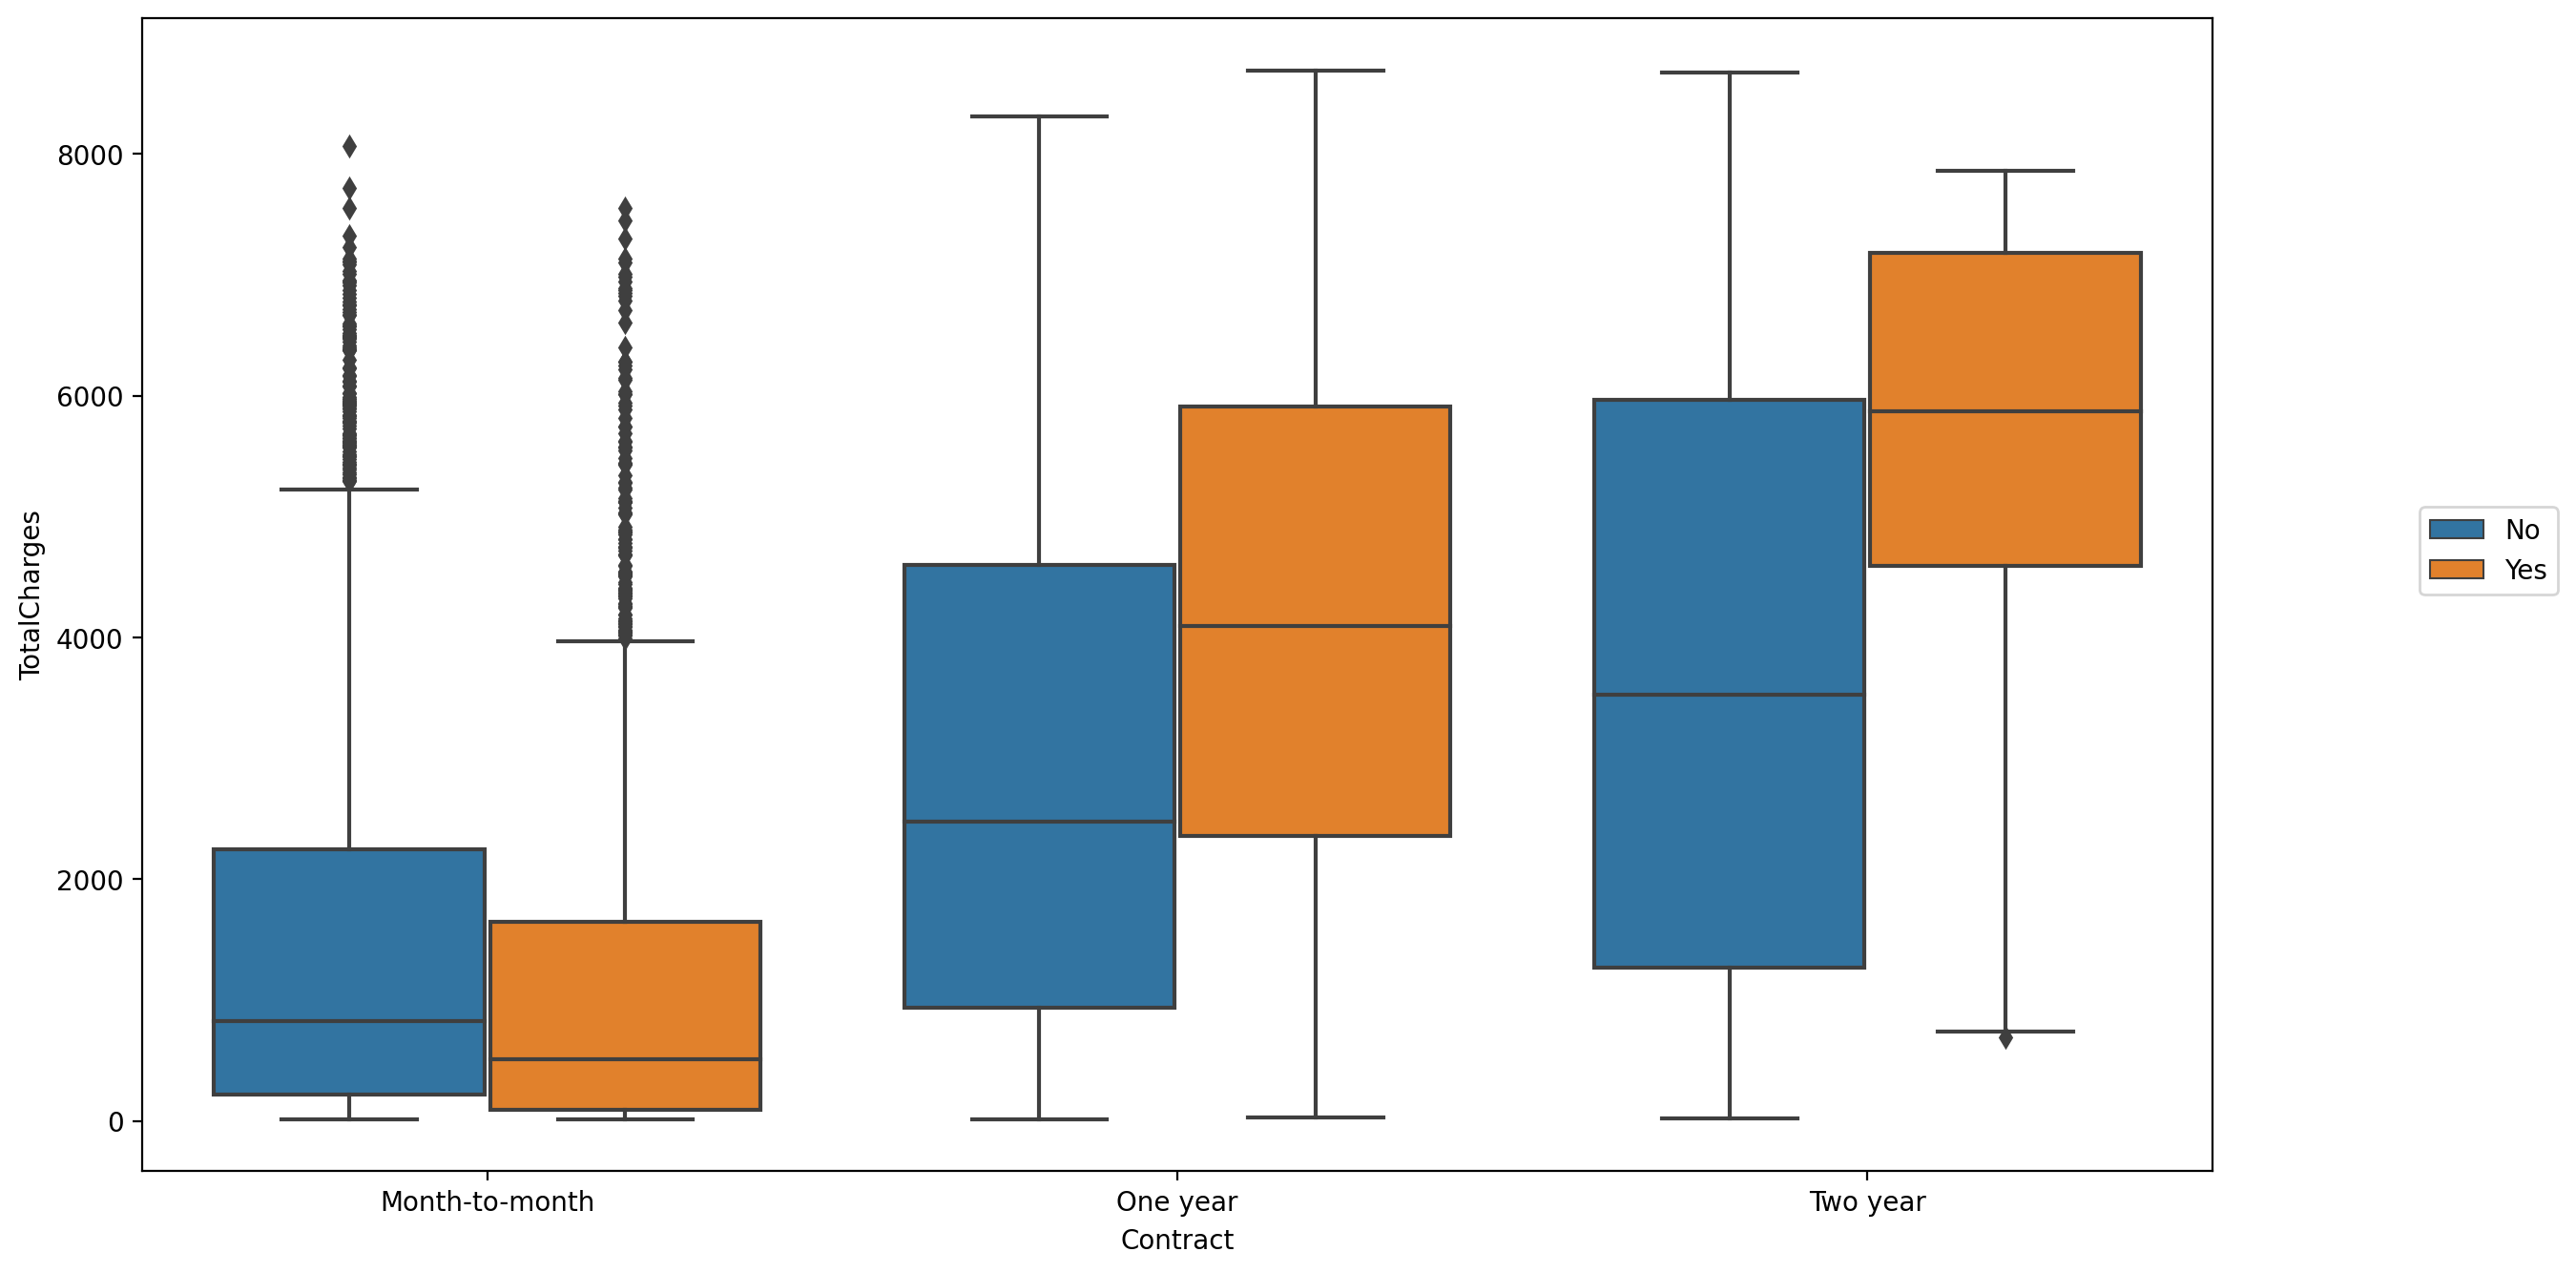

In [25]:
# create boxplot to show the distribution of total chare per contract type
plt.figure(figsize=(14,8), dpi=200)
sns.boxplot(data=data, y='TotalCharges', x='Contract', hue='Churn')
plt.legend(loc=(1.1,0.5))

In [29]:
# Display the columns of the data
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Churn Analysis

In [31]:
# Display the three contract types avaiable
data['Contract'].unique()

['Month-to-month', 'One year', 'Two year']

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

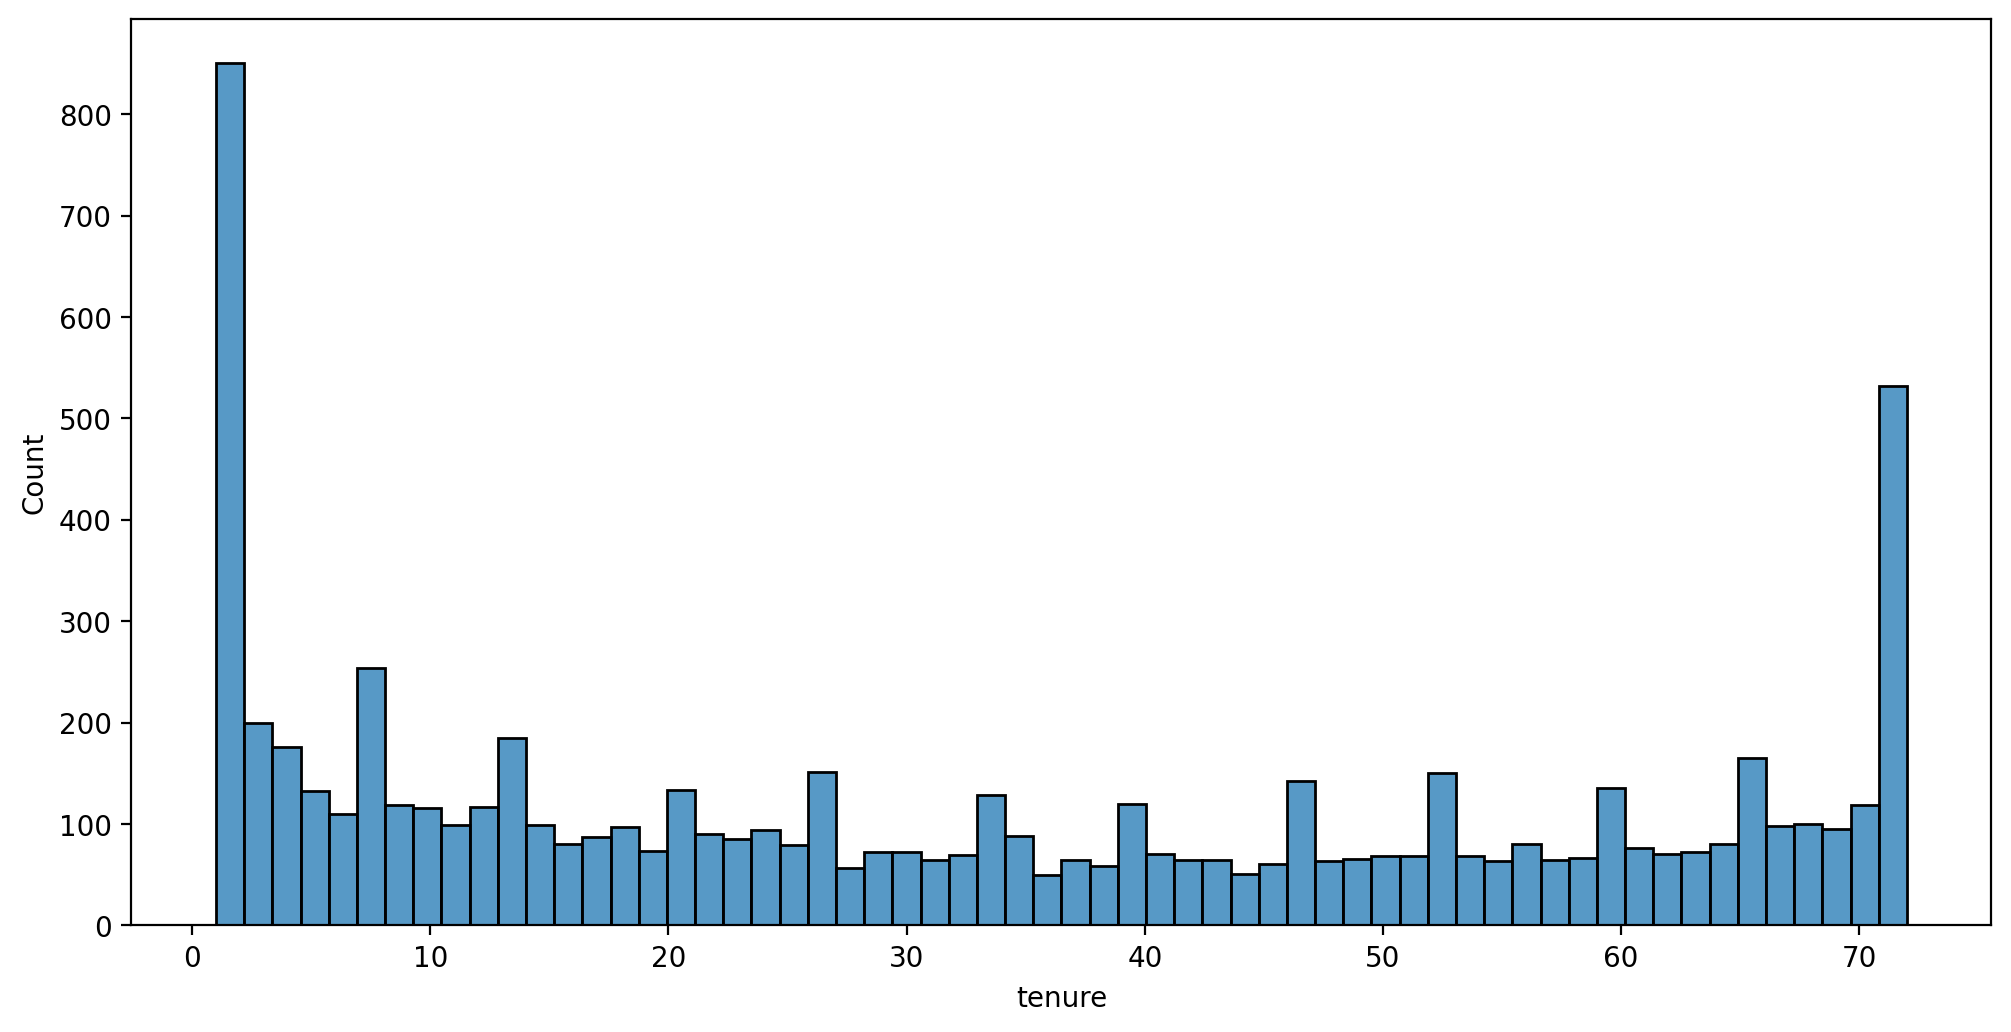

In [37]:
# Histogram showing distribution of tenure column
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=data, x='tenure', bins=60);

# Predictive Modeling

## Single Decision Tree

In [40]:
# Separate data  into X features and y lables
X = data.drop(['Churn', 'customerID'], axis=1)
y = data['Churn']

In [41]:
X = pd.get_dummies(X, drop_first=True)

In [42]:
# Performing train test split
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# Single Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
decision_tress = DecisionTreeClassifier(max_depth=6)

In [47]:
decision_tress.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [48]:
prediction = decision_tress.predict(X_test)

# Model Evaluation

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

In [51]:
accuracy_score(y_test, prediction)

0.8096590909090909

In [52]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



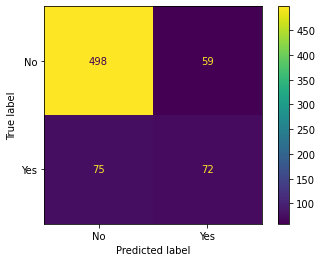

In [54]:
plot_confusion_matrix(decision_tress, X_test,y_test)

In [56]:
import_feature = decision_tress.feature_importances_
import_feature

array([0.01082504, 0.42391407, 0.0441482 , 0.06613492, 0.00123697,
       0.        , 0.        , 0.00696195, 0.00088963, 0.01243191,
       0.31406016, 0.02628952, 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ])

In [59]:
import_feature = pd.DataFrame(data=decision_tress.feature_importances_, index=X.columns, 
                              columns=['Feature Importance'])

In [62]:
needed_features = import_feature[import_feature['Feature Importance']>0]
needed_features

,Feature Importance
SeniorCitizen,0.010825
tenure,0.423914
MonthlyCharges,0.044148
TotalCharges,0.066135
gender_Male,0.001237
PhoneService_Yes,0.006962
MultipleLines_No phone service,0.000890
MultipleLines_Yes,0.012432
InternetService_Fiber optic,0.314060
InternetService_No,0.026290


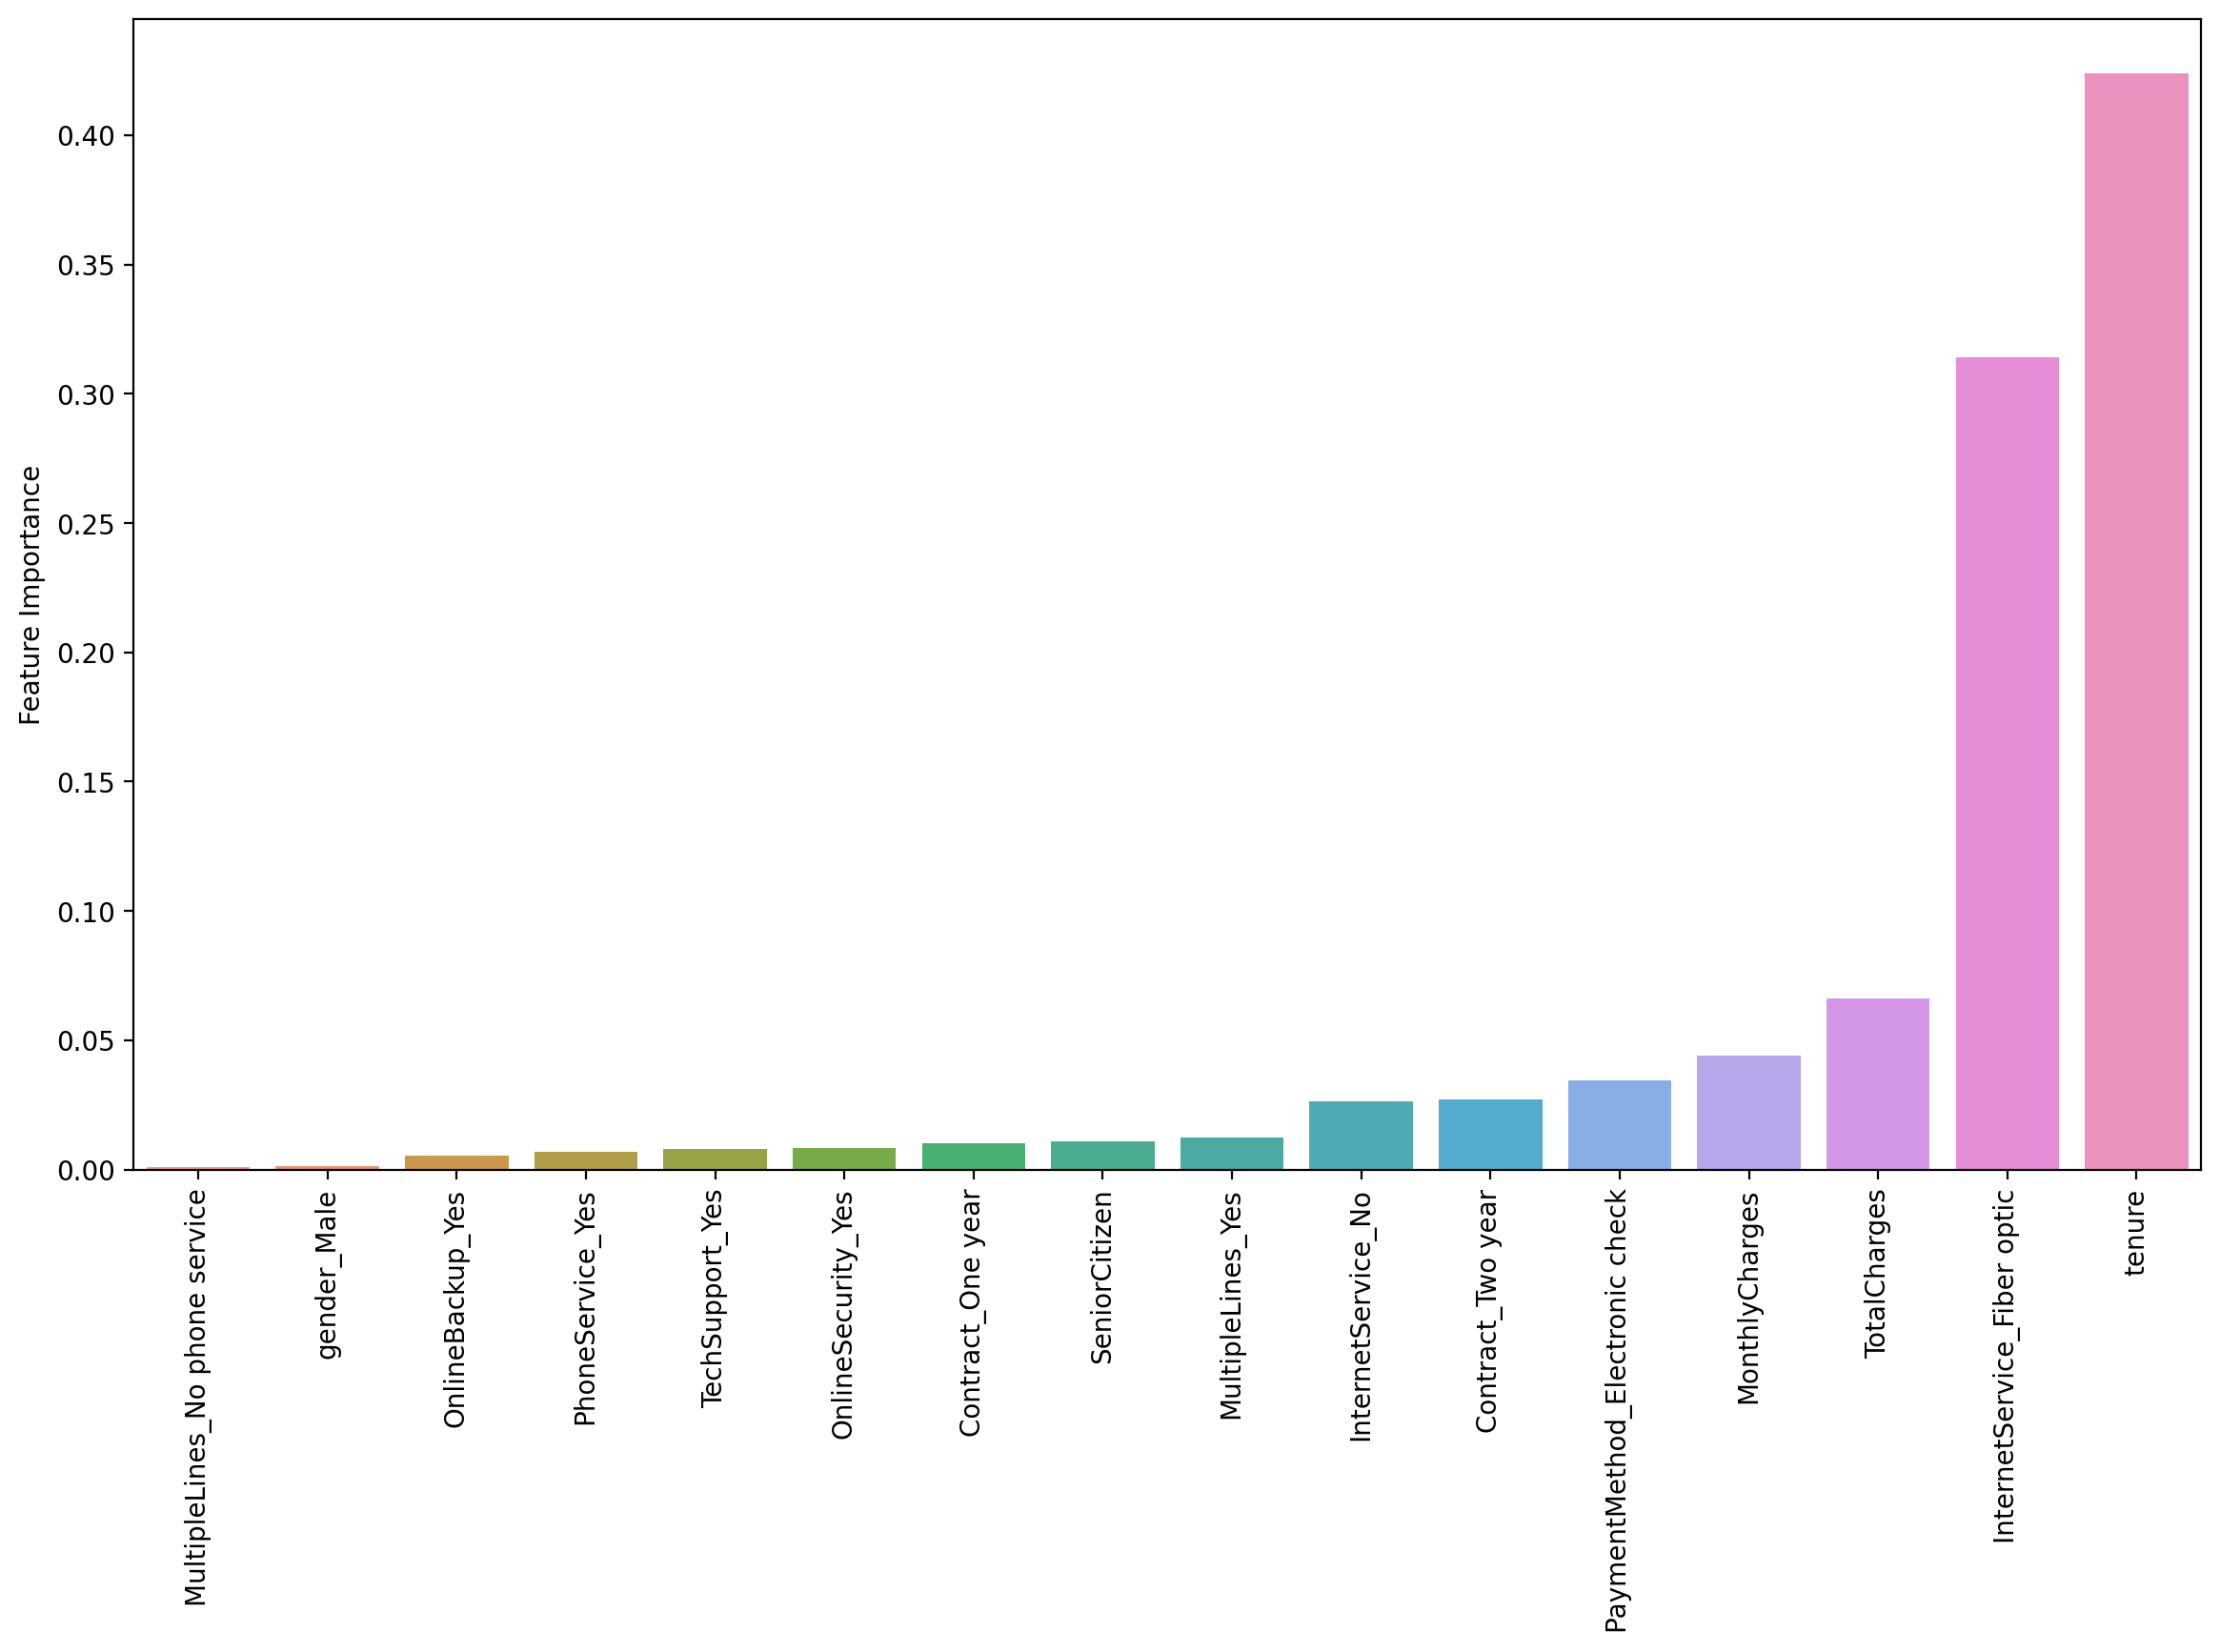

In [70]:
plt.figure(figsize=(14,8), dpi=200)
sns.barplot(data=needed_features.sort_values('Feature Importance'), x=needed_features.sort_values('Feature Importance').index, y='Feature Importance')
plt.xticks(rotation=90);

In [72]:
from sklearn.tree import plot_tree

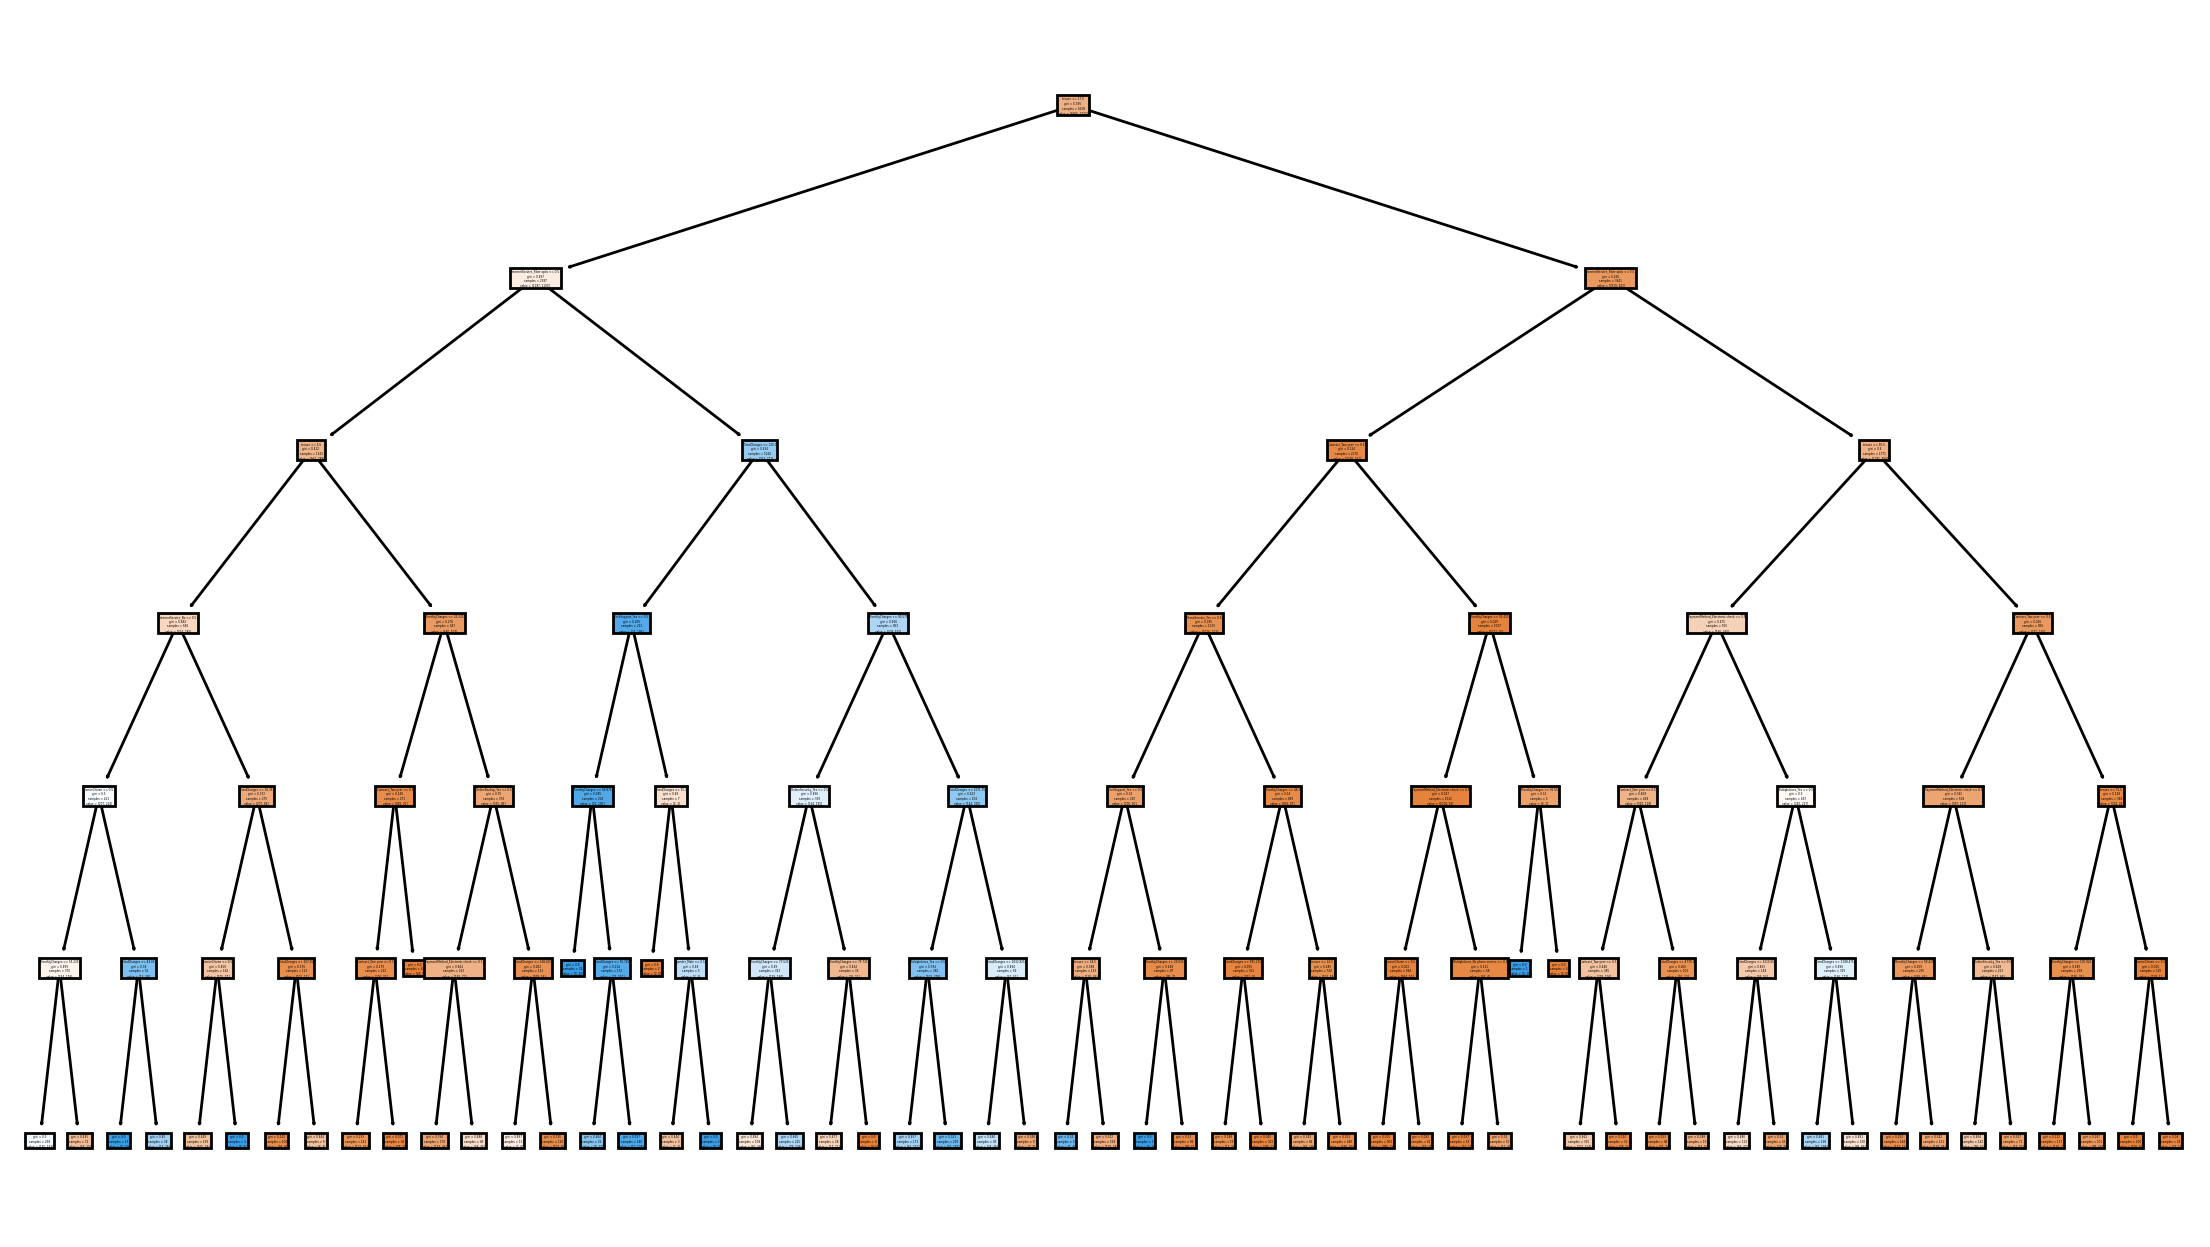

In [77]:
plt.figure(figsize=(14,8), dpi=200)
plot_tree(decision_tress, feature_names=X.columns, filled=True);

## Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rand_for = RandomForestClassifier(n_estimators=100)

In [80]:
rand_for.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
prediction = rand_for.predict(X_test)

In [82]:
accuracy_score(y_test,prediction)

0.7954545454545454

In [83]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.51      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



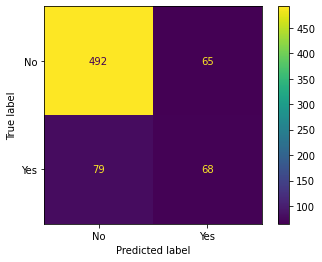

In [84]:
plot_confusion_matrix(rand_for, X_test, y_test)

# Boosted Model

In [87]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [88]:
ada_bost = AdaBoostClassifier()

In [89]:
ada_bost.fit(X_train, y_train)

AdaBoostClassifier()

In [90]:
prediction = ada_bost.predict(X_test)

In [91]:
accuracy_score(y_test, prediction)

0.8295454545454546

In [92]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



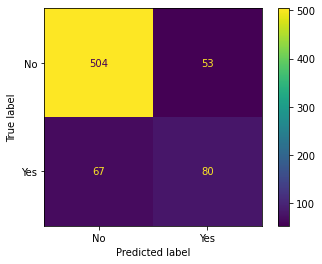

In [95]:
plot_confusion_matrix(ada_bost, X_test,y_test)

# THE END